In [1]:
import simpy, random
from queue_simulation2b import (
    ServiceOperation, SIMULATION_DURATION, SEED,
    SocialWorkerShifts, DutyOfficerShifts, VolunteerShifts)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set();

In [4]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

# modify matplotlib and seaborn settings
# to display Chinese 
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['font.weight'] = 'medium'

sns.set(font=['sans-serif'])
sns.set_style('dark',{'font.sans-serif':['Noto Serif CJK JP']})
sns.set_context('talk')

# 1. plot counsellor shifts

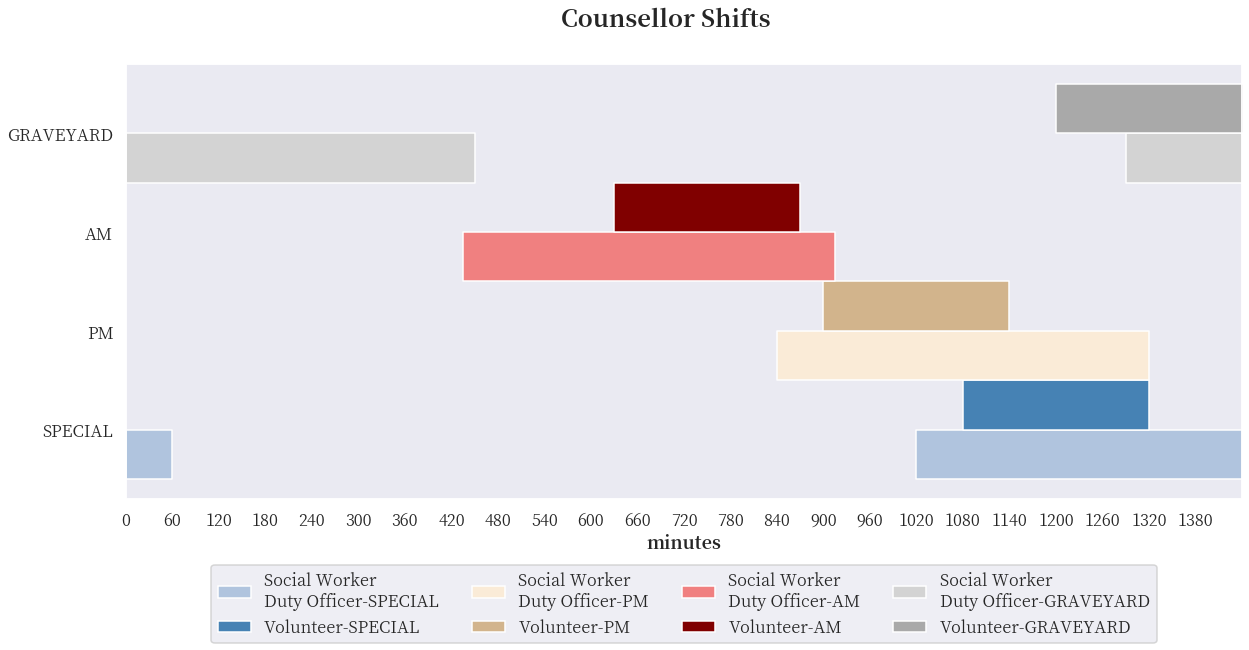

In [5]:
fig, ax = plt.subplots( figsize=(20, 8))
ax.set_xlim(0, 1440)


# special
ax.broken_barh([(SocialWorkerShifts.SPECIAL.start, 1440),
    (0, SocialWorkerShifts.SPECIAL.end%1440)],
    (1, 1), facecolors='lightsteelblue',
    label=f'Social Worker\nDuty Officer-{SocialWorkerShifts.SPECIAL.shift_name}')
ax.broken_barh([(VolunteerShifts.SPECIAL.start,
    VolunteerShifts.PM.duration)],
    (2, 1), facecolors='steelblue',
    label=f'Volunteer-{VolunteerShifts.SPECIAL.shift_name}')


# PM
ax.broken_barh([(SocialWorkerShifts.PM.start,
    SocialWorkerShifts.PM.duration)],
    (3, 1), facecolors='antiquewhite',
    label=f'Social Worker\nDuty Officer-{SocialWorkerShifts.PM.shift_name}'
)
ax.broken_barh([(VolunteerShifts.PM.start,
    VolunteerShifts.PM.duration)],
    (4, 1), facecolors='tan',
    label=f'Volunteer-{VolunteerShifts.PM.shift_name}'
)



# AM
ax.broken_barh([(SocialWorkerShifts.AM.start, 
    SocialWorkerShifts.AM.duration)],
    (5, 1), facecolors='lightcoral',
    label=f'Social Worker\nDuty Officer-{SocialWorkerShifts.AM.shift_name}'
)
ax.broken_barh([(VolunteerShifts.AM.start, 
    VolunteerShifts.AM.duration)],
    (6, 1), facecolors='maroon',
    label=f'Volunteer-{VolunteerShifts.AM.shift_name}'
)


# graveyard
ax.broken_barh([(SocialWorkerShifts.GRAVEYARD.start, 1440),
    (0, SocialWorkerShifts.GRAVEYARD.end%1440)],
    (7, 1), facecolors='lightgrey',
    label=f'Social Worker\nDuty Officer-{SocialWorkerShifts.GRAVEYARD.shift_name}'              
)
ax.broken_barh([(VolunteerShifts.GRAVEYARD.start,
    VolunteerShifts.GRAVEYARD.end)],
    (8, 1), facecolors='darkgrey',
    label=f'Volunteer-{VolunteerShifts.GRAVEYARD.shift_name}',
)


ax.set_xticks([x for x in range(0, 1440, 60)])
ax.set_xlabel('minutes')
ax.set_yticks([x for x in range(2, 9 , 2)])
ax.set_yticklabels([
    SocialWorkerShifts.GRAVEYARD.shift_name,
    SocialWorkerShifts.AM.shift_name,
    SocialWorkerShifts.PM.shift_name,
    SocialWorkerShifts.SPECIAL.shift_name,
    ][::-1])

fig.suptitle('Counsellor Shifts', fontweight='bold', fontsize=24)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.35), ncol=4)

plt.show()

# 2. Queue Simulation

In [6]:
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initializing OpenUp Queue Simulation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

random.seed(744) # comment out line if not reproducing results
queue_status = []
max_queue_length = []
num_helpseekers = []
num_helpseekers_accepted_TOS = []
num_helpseekers_rejected_TOS = []
num_helpseekers_served = []
num_helpseekers_served_g_regular = []
num_helpseekers_served_g_repeated = []
num_helpseekers_reneged = []
# num_helpseekers_reneged_g_regular = []
# num_helpseekers_reneged_g_repeated = []
num_available_counsellor_processes = []
queue_time_stats = []
renege_time_stats = []
    
for i in range(1, 2):
# for i in range(1, 1501):
    # create environment
    env = simpy.Environment() 

    # set up service operation and run simulation until  
    S = ServiceOperation(env=env)
    env.run(until=SIMULATION_DURATION)

#     print(f'Iteration #{i} ')
      
    num_helpseekers.append(S.num_helpseekers)
    num_helpseekers_accepted_TOS.append(S.num_helpseekers_TOS_accepted)
    num_helpseekers_rejected_TOS.append(S.num_helpseekers_TOS_rejected)
    max_queue_length.append(S.helpseeker_queue_max_length)
    queue_status.extend(S.queue_status)
    num_available_counsellor_processes.extend(S.num_available_counsellor_processes)
    num_helpseekers_served.append(S.served)
    num_helpseekers_served_g_regular.append(S.served_g_regular)
    num_helpseekers_served_g_repeated.append(S.served_g_repeated)
    num_helpseekers_reneged.append(S.reneged)
    queue_time_stats.append(S.queue_time_stats)
    renege_time_stats.append(S.renege_time_stats)
#     num_helpseekers_reneged_g_regular.append(S.reneged_g_regular)
#     num_helpseekers_reneged_g_repeated.append(S.reneged_g_repeated)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initializing OpenUp Queue Simulation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [7]:
num_helpseekers = pd.Series(num_helpseekers, name='number of helpseekers')
num_helpseekers_accepted_TOS = pd.Series(num_helpseekers_accepted_TOS, name='number of helpseekers accepted TOS')
num_helpseekers_rejected_TOS = pd.Series(num_helpseekers_rejected_TOS, name='number of helpseekers rejected TOS')
num_helpseekers_served = pd.Series(num_helpseekers_served, name='number of helpseekers served')
num_helpseekers_served_g_regular = pd.Series(num_helpseekers_served_g_regular, name='number of users served')
num_helpseekers_served_g_repeated = pd.Series(num_helpseekers_served_g_repeated, name='number of repeated users served')
num_helpseekers_reneged = pd.Series(num_helpseekers_reneged, name='number of helpseekers reneged')
# num_helpseekers_reneged_g_regular = pd.Series(num_helpseekers_reneged_g_regular, name='number of users reneged')
# num_helpseekers_reneged_g_repeated = pd.Series(num_helpseekers_reneged_g_repeated, name='number of repeated users reneged')
# queue_status = pd.Series(queue_status, name='number of instances queue exceeded four helpseekers')
max_queue_length = pd.Series(max_queue_length, name='max queue length')

In [8]:
# function to calculate classification confidence intervals
# parameter: stats - list of confidence intervals, which must be ordered
#            metadata - any string to annotate printout, can be None
# precondition - metadata must be a string or None, and stats must be a list
#                  The check is commented out for now as asserts should 
#               be done outside function
# returns: cutoff values at 2.5% and 95% percentiles
def calculate_confidence_intervals(stats, metadata=None):
    # if not isinstance(metadata, None) or \
    #     not isinstance(metadata, str) or \
    #     not isinstance(stats, list):
    #     return
        
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(stats, q_lower)
    upper_percentile = np.percentile(stats, q_upper)
    mean = np.mean(stats)
        
    print('\n%s %d%% Confidence interval:' % (
        metadata, confidence_interval) )
    print('----------------------------')
    print('%.1f%% percentile: %.5f' % (q_lower, lower_percentile) )
    print('%.1f%% percentile: %.5f\n' % (q_upper, upper_percentile) )
    print('mean value: %.5f' % mean)
    return (lower_percentile, upper_percentile, mean)

In [9]:
def plot_distribution(series, filename):
    confidence_interval = .95 # 95 percent confidence level
    q_lower = .5 * (1 - confidence_interval)
    q_upper = confidence_interval + q_lower
        
    # convert to percentages
    q_lower = q_lower * 100
    q_upper = q_upper * 100
    confidence_interval = confidence_interval * 100
        
    #     print(q_lower, q_upper)
    lower_percentile = np.percentile(series, q_lower)
    upper_percentile = np.percentile(series, q_upper)
    mean = np.mean(series)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5) )
    sns.distplot(series, ax=ax)
    ax.axvline(x=lower_percentile, linestyle='--' )
    ax.axvline(x=upper_percentile, linestyle='--' )
    ax.axvline(x=mean, linestyle=':', linewidth=2 )
    
    fig.savefig(f'{filename}.png', dpi=300, bbox_inches='tight')

/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


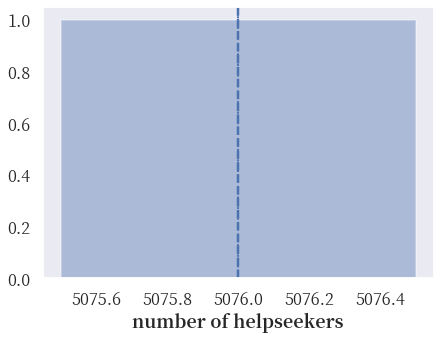

In [10]:
plot_distribution(num_helpseekers, 'num_helpseekers')

In [11]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 5076.00000
97.5% percentile: 5076.00000

mean value: 5076.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


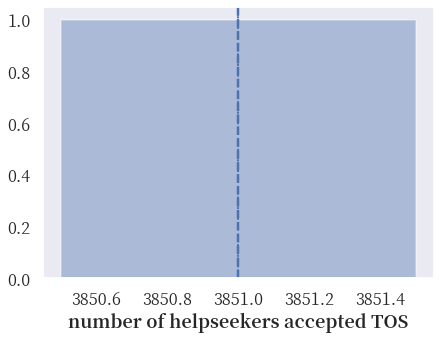

In [12]:
plot_distribution(num_helpseekers_accepted_TOS, 'num_helpseekers_accepted_TOS')

In [13]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_accepted_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3851.00000
97.5% percentile: 3851.00000

mean value: 3851.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


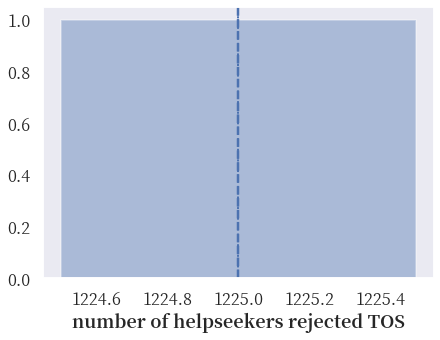

In [14]:
plot_distribution(num_helpseekers_rejected_TOS, 'num_helpseekers_rejected_TOS')

In [15]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_rejected_TOS.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 1225.00000
97.5% percentile: 1225.00000

mean value: 1225.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


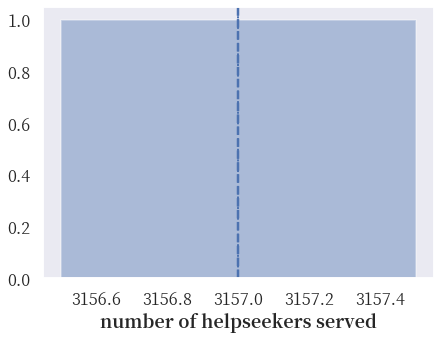

In [16]:
plot_distribution(num_helpseekers_served, 'num_helpseekers_served')

In [17]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 3157.00000
97.5% percentile: 3157.00000

mean value: 3157.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


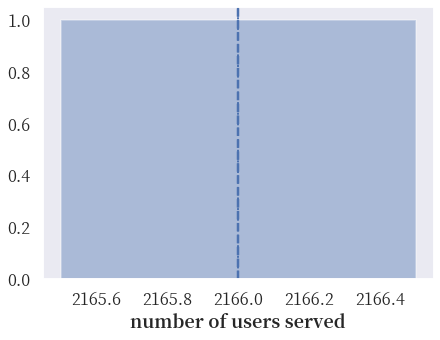

In [18]:
plot_distribution(num_helpseekers_served_g_regular, 'num_helpseekers_served_g_regular')

In [19]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_regular.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 2166.00000
97.5% percentile: 2166.00000

mean value: 2166.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


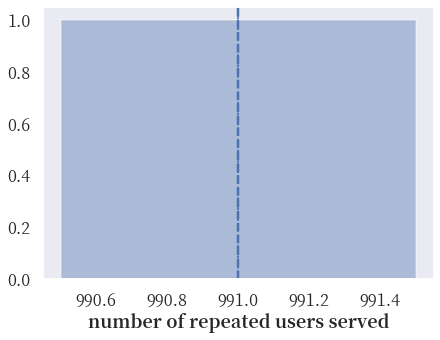

In [20]:
plot_distribution(num_helpseekers_served_g_repeated, 'num_helpseekers_served_g_repeated')

In [21]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_served_g_repeated.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 991.00000
97.5% percentile: 991.00000

mean value: 991.00000


/home/cathug/miniconda3/envs/csrp/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


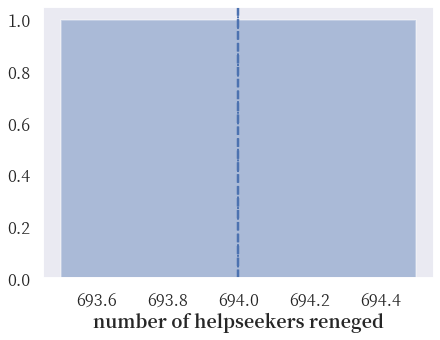

In [22]:
plot_distribution(num_helpseekers_reneged, 'num_helpseekers_reneged')

In [23]:
lower, upper, mean = calculate_confidence_intervals(
    num_helpseekers_reneged.sort_values().to_list() )


None 95% Confidence interval:
----------------------------
2.5% percentile: 694.00000
97.5% percentile: 694.00000

mean value: 694.00000


In [24]:
# plot_distribution(num_helpseekers_reneged_g_regular, 'num_helpseekers_reneged_g_regular')

In [25]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_regular.sort_values().to_list() )

In [26]:
# plot_distribution(num_helpseekers_reneged_g_repeated, 'num_helpseekers_reneged_g_repeated')

In [27]:
# lower, upper, mean = calculate_confidence_intervals(
#     num_helpseekers_reneged_g_repeated.sort_values().to_list() )

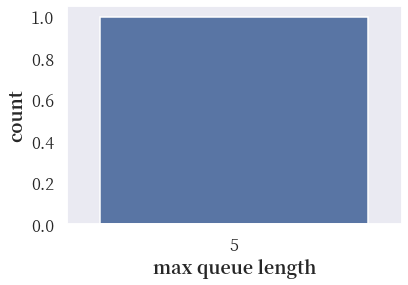

In [28]:
max_queue_length_count = sns.countplot(x='max queue length', data=max_queue_length.to_frame())

max_queue_length_count.get_figure().savefig(f'max_queue_length_count.png', dpi=300, bbox_inches='tight')

In [29]:
queue_status = pd.DataFrame(queue_status, columns=['day_of_week', 'hour', 'queue_length'])

In [30]:
queue_status['hour'] = queue_status['hour'].str.replace('hour:', '').astype(int)

In [31]:
queue_status['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [32]:
queue_status['queue_length'] = queue_status['queue_length'].str.replace('queue_length:', '').astype(int)

In [33]:
queue_status

,day_of_week,hour,queue_length
0,Sunday,0,0
1,Sunday,0,0
2,Sunday,0,0
3,Sunday,0,0
4,Sunday,0,0
...,...,...,...
3846,Monday,23,2
3847,Monday,23,2
3848,Monday,23,1
3849,Monday,23,0


In [34]:
queue_status['total']=1

In [35]:
totals = queue_status.groupby(
    ['day_of_week', 'hour', 'queue_length']).sum()

In [36]:
totals = totals.reset_index()

In [37]:
totals

,day_of_week,hour,queue_length,total
0,Friday,0,0,42
1,Friday,1,0,32
2,Friday,2,0,21
3,Friday,3,0,14
4,Friday,4,0,16
...,...,...,...,...
204,Wednesday,22,0,22
205,Wednesday,22,1,7
206,Wednesday,23,0,20
207,Wednesday,23,1,9


In [38]:
totals = pd.pivot_table(totals, values='total', columns=['queue_length'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [39]:
totals_percent = (((totals.T/totals.T.sum()).T)*100)#.round(2)

totals_percent

In [40]:
totals_percent

queue_length               0          1         2    3    4    5
day_of_week hour                                                
Friday      0     100.000000   0.000000  0.000000  0.0  0.0  0.0
            1     100.000000   0.000000  0.000000  0.0  0.0  0.0
            2     100.000000   0.000000  0.000000  0.0  0.0  0.0
            3     100.000000   0.000000  0.000000  0.0  0.0  0.0
            4     100.000000   0.000000  0.000000  0.0  0.0  0.0
...                      ...        ...       ...  ...  ...  ...
Wednesday   19    100.000000   0.000000  0.000000  0.0  0.0  0.0
            20    100.000000   0.000000  0.000000  0.0  0.0  0.0
            21     82.500000  17.500000  0.000000  0.0  0.0  0.0
            22     75.862069  24.137931  0.000000  0.0  0.0  0.0
            23     66.666667  30.000000  3.333333  0.0  0.0  0.0

[168 rows x 6 columns]

In [41]:
totals_percent2 = totals_percent.reset_index()

In [42]:
totals_percent2['day_int'] = totals_percent2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [43]:
totals_percent2 = totals_percent2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [44]:
totals_percent2

queue_length               0          1         2    3    4    5
day_of_week hour                                                
Sunday      0     100.000000   0.000000  0.000000  0.0  0.0  0.0
            1     100.000000   0.000000  0.000000  0.0  0.0  0.0
            2     100.000000   0.000000  0.000000  0.0  0.0  0.0
            3     100.000000   0.000000  0.000000  0.0  0.0  0.0
            4     100.000000   0.000000  0.000000  0.0  0.0  0.0
...                      ...        ...       ...  ...  ...  ...
Saturday    19    100.000000   0.000000  0.000000  0.0  0.0  0.0
            20    100.000000   0.000000  0.000000  0.0  0.0  0.0
            21     92.592593   7.407407  0.000000  0.0  0.0  0.0
            22     84.848485  15.151515  0.000000  0.0  0.0  0.0
            23     70.588235  23.529412  5.882353  0.0  0.0  0.0

[168 rows x 6 columns]

In [45]:
totals_percent2['2_or_above'] = 0
for i in totals_percent2.columns[2:]:
    totals_percent2['2_or_above'] += totals_percent2[i]

In [46]:
totals_percent2.reset_index(inplace=True)

In [47]:
totals_percent2['new_ind'] = totals_percent2['day_of_week'] + '_'+ totals_percent2['hour'].astype(str)

In [48]:
totals_percent3 = totals_percent2.set_index('new_ind')[[0, 1, '2_or_above']].copy()

In [49]:
# fig, ax = plt.subplots(figsize=(10, 100) )


# sns.heatmap(totals_percent, annot=True, ax=ax, annot_kws={"size": 12}, 
#     cmap=sns.diverging_palette(220, 10, sep=80, n=255)
# );
# fig.suptitle('Queue Length Probabilities by\nthe day of the week and hour\n'
#              '#Social Worker(s) × #sim chats max: 2 × 4,\n'
#              '#Duty Officer(s) × #sim chats max: 1 × 1,\n'
#              '#Volunteer(s) × #sim chats max: 2 × 1',
#     fontsize=24, weight='heavy',
#     fontweight=1000, y=.9)
# plt.subplots_adjust(bottom=0.2)

# # workaround from https://github.com/mwaskom/seaborn/issues/1773
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

# fig.savefig(f'queue_output/Queue_SW_24_DO_11_V_21.png', dpi=300, bbox_inches='tight')

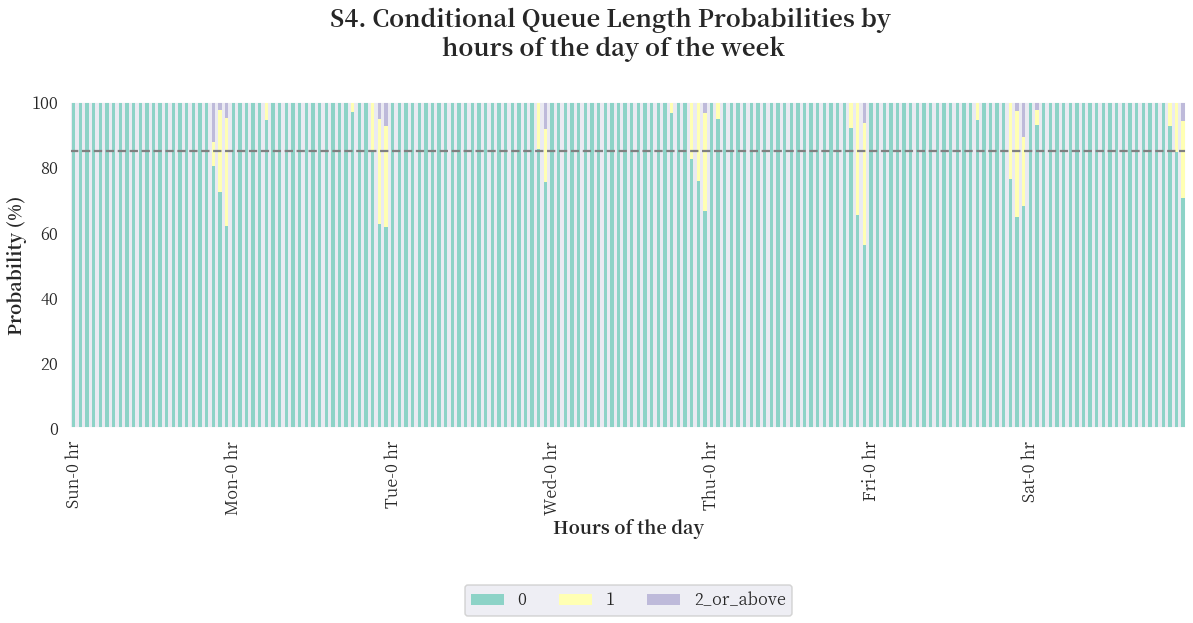

In [50]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S4. Conditional Queue Length Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

totals_percent3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=3)
fig.savefig(f'queue_output/Queue_SW_2434_DO_11_V_2423-45.png', dpi=300, bbox_inches='tight')

In [51]:
# queue_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
#     col_order=['Sunday',
#         'Monday',
#         'Tuesday',
#         'Wednesday',
#         'Thursday',
#         'Friday',
#         'Saturday'],
#     data=queue_status, kind="count",
#     height=4, aspect=1);
# queue_plot.savefig(f'queue_blowup.png', dpi=300, bbox_inches='tight')

In [52]:
# queue_time_stats[0]

In [53]:
queue_time_stats = pd.DataFrame(queue_time_stats[0], columns=['day_of_week', 'hour', 'queue_time'])

In [54]:
queue_time_stats['hour'] = queue_time_stats['hour'].str.replace('hour:', '').astype(int)

In [55]:
queue_time_stats['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [56]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,time_spent_in_queue:0.0
1,Sunday,0,time_spent_in_queue:0.0
2,Sunday,0,time_spent_in_queue:0.0
3,Sunday,0,time_spent_in_queue:0.0
4,Sunday,0,time_spent_in_queue:0.0
...,...,...,...
3152,Monday,21,time_spent_in_queue:0.0
3153,Monday,21,time_spent_in_queue:0.0
3154,Monday,21,time_spent_in_queue:0.0
3155,Monday,21,time_spent_in_queue:0.0


In [57]:
queue_time_stats['queue_time'] = queue_time_stats['queue_time'].str.replace(
    'time_spent_in_queue:', '').astype(float)

In [58]:
queue_time_stats

,day_of_week,hour,queue_time
0,Sunday,0,0.0
1,Sunday,0,0.0
2,Sunday,0,0.0
3,Sunday,0,0.0
4,Sunday,0,0.0
...,...,...,...
3152,Monday,21,0.0
3153,Monday,21,0.0
3154,Monday,21,0.0
3155,Monday,21,0.0


In [59]:
queue_time_stats['total']=1

In [60]:
# totals = 
queue_time_stats.mean()

hour          10.679759
queue_time     0.012520
total          1.000000
dtype: float64

In [61]:
queue_time_stats['queue_time_group'] = queue_time_stats['queue_time'].apply(lambda x: '<=5 minutes' if x<=5 else '>5 minutes')

In [62]:
queue_time_stats['queue_time_group']

0       <=5 minutes
1       <=5 minutes
2       <=5 minutes
3       <=5 minutes
4       <=5 minutes
           ...     
3152    <=5 minutes
3153    <=5 minutes
3154    <=5 minutes
3155    <=5 minutes
3156    <=5 minutes
Name: queue_time_group, Length: 3157, dtype: object

In [63]:
queue_time_stats = pd.pivot_table(queue_time_stats, values='total', columns=['queue_time_group'],
              index=['day_of_week', 'hour'], aggfunc=np.sum, fill_value=0)

In [64]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              42           0
            1              32           0
            2              21           0
            3              14           0
            4              16           0
...                       ...         ...
Wednesday   17             25           0
            18             30           0
            19             26           0
            20             16           0
            21             20           0

[154 rows x 2 columns]

In [65]:
queue_time_stats_percent = (((queue_time_stats.T/queue_time_stats.T.sum()).T)*100)#.round(2)

In [66]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              42           0
            1              32           0
            2              21           0
            3              14           0
            4              16           0
...                       ...         ...
Wednesday   17             25           0
            18             30           0
            19             26           0
            20             16           0
            21             20           0

[154 rows x 2 columns]

In [67]:
queue_time_stats2 = queue_time_stats_percent.reset_index()

In [68]:
queue_time_stats2['day_int'] = queue_time_stats2['day_of_week'].map({
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4
})

In [69]:
queue_time_stats2 = queue_time_stats2.sort_values(
    by=['day_int', 'hour']).reset_index(drop=True).set_index(
    ['day_of_week', 'hour']).drop(columns=['day_int'])

In [70]:
queue_time_stats2

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Sunday      0           100.0         0.0
            1           100.0         0.0
            2           100.0         0.0
            3           100.0         0.0
            4           100.0         0.0
...                       ...         ...
Saturday    17          100.0         0.0
            18          100.0         0.0
            19          100.0         0.0
            20          100.0         0.0
            21          100.0         0.0

[154 rows x 2 columns]

In [71]:
queue_time_stats2.reset_index(inplace=True)

In [72]:
queue_time_stats2['new_ind'] = queue_time_stats2['day_of_week'] + '_'+ queue_time_stats2['hour'].astype(str)

In [73]:
queue_time_stats3 = queue_time_stats2.set_index('new_ind')[['<=5 minutes', '>5 minutes']].copy()

In [74]:
queue_time_stats3

queue_time_group,<=5 minutes,>5 minutes
new_ind,,
Sunday_0,100.0,0.0
Sunday_1,100.0,0.0
Sunday_2,100.0,0.0
Sunday_3,100.0,0.0
Sunday_4,100.0,0.0
...,...,...
Saturday_17,100.0,0.0
Saturday_18,100.0,0.0
Saturday_19,100.0,0.0


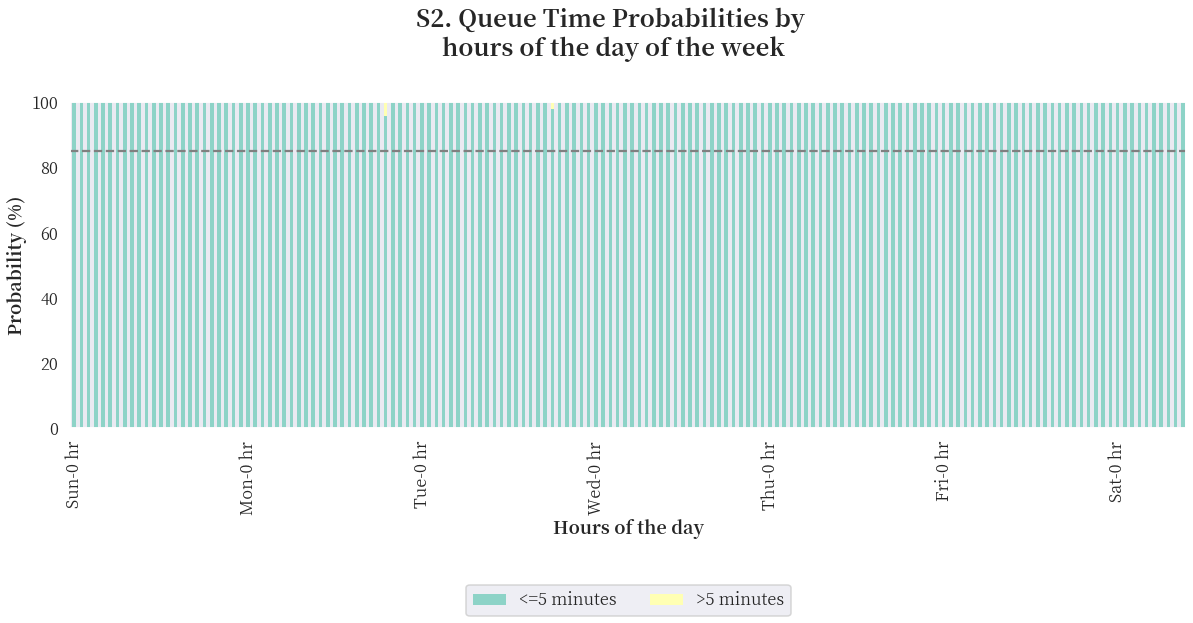

In [75]:
fig, ax = plt.subplots(figsize=(20,6) )
palette = sns.color_palette("Set3")

fig.suptitle('S2. Queue Time Probabilities by\n hours of the day of the week',
    fontsize=24, weight='heavy',
    fontweight=1000, y=1.1)

queue_time_stats3.plot.bar(
    stacked=True,
    ax=ax,
    linewidth=.01,
    color=palette
)

ax.axhline(y=85, linestyle='--', color='grey')
ax.set_xticklabels(labels=[f'{x[:3]}-{x[-1]} hr' 
    if x[-2:] == '_0' else ''
    for x in totals_percent3.index])

ax.set_xlabel('Hours of the day')
ax.set_ylabel('Probability (%)')



ax.set_ylim(0,100)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.6), ncol=2)
fig.savefig(f'queue_output/QueueTime_SW_2434_DO_11_V_2423-45.png', dpi=300, bbox_inches='tight')

# determine hours counsellors are maxed out

In [76]:
from queue_simulation import (
    MINUTES_PER_DAY, DAYS_IN_WEEK, MINUTES_PER_HOUR, 
    MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER,
    MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER,
    MAX_SIMULTANEOUS_CHATS_VOLUNTEER,)

In [77]:
MAX_SIMULTANEOUS_CHATS_VOLUNTEER

1

In [78]:
MAX_SIMULTANEOUS_CHATS_DUTY_OFFICER

1

In [79]:
MAX_SIMULTANEOUS_CHATS_SOCIAL_WORKER

3

In [80]:
df2 = pd.DataFrame(num_available_counsellor_processes, columns=['time', 'num_counsellor_processes_idle'])

In [81]:
df2

,time,num_counsellor_processes_idle
0,1.609286,24
1,3.392647,23
2,4.804500,22
3,7.431992,21
4,7.945436,20
...,...,...
3846,43176.188135,31
3847,43176.862925,31
3848,43177.080053,31
3849,43179.116046,31


In [82]:
df2['time_int'] = df2['time'].astype(int)

In [83]:
df2['current_day_minutes'] = df2['time_int'] % MINUTES_PER_DAY

In [84]:
df2['weekday'] = (df2['time_int'] / MINUTES_PER_DAY).astype(int) % DAYS_IN_WEEK

In [85]:
df2['hour'] = (df2['current_day_minutes'] / MINUTES_PER_HOUR).astype(int)

In [86]:
df2['day_of_week'] = df2['weekday'].replace({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [87]:
df2['total']=1

In [88]:
df2

,time,num_counsellor_processes_idle,time_int,current_day_minutes,weekday,hour,day_of_week,total
0,1.609286,24,1,1,0,0,Sunday,1
1,3.392647,23,3,3,0,0,Sunday,1
2,4.804500,22,4,4,0,0,Sunday,1
3,7.431992,21,7,7,0,0,Sunday,1
4,7.945436,20,7,7,0,0,Sunday,1
...,...,...,...,...,...,...,...,...
3846,43176.188135,31,43176,1416,1,23,Monday,1
3847,43176.862925,31,43176,1416,1,23,Monday,1
3848,43177.080053,31,43177,1417,1,23,Monday,1
3849,43179.116046,31,43179,1419,1,23,Monday,1


In [89]:
df2 = pd.pivot_table(df2, values='total', columns=['num_counsellor_processes_idle'],
              index=[#'weekday', 'day_of_week', 
                     'hour'], aggfunc=np.sum, fill_value=0)

In [90]:
df2 = (((df2.T/df2.T.sum()).T)*100)#.round(2)

In [91]:
# df2 = df2.reset_index(drop=False).drop(columns=['weekday'])
# selection = df2[df2['day_of_week']=='Monday'].copy()

In [92]:
# df2.groupby('hour').mean()

In [93]:
# selection.set_index(['day_of_week', 'hour']).to_excel(
#     'queue_output/num_idle_procs_SW_2434_DO_11_V_2423-45.xlsx')

In [94]:
queue_time_stats

queue_time_group  <=5 minutes  >5 minutes
day_of_week hour                         
Friday      0              42           0
            1              32           0
            2              21           0
            3              14           0
            4              16           0
...                       ...         ...
Wednesday   17             25           0
            18             30           0
            19             26           0
            20             16           0
            21             20           0

[154 rows x 2 columns]

In [95]:
user_patience = pd.DataFrame(renege_time_stats[0], columns=['day_of_week', 'hour', 'patience'])

In [96]:
user_patience['day_of_week'].replace({
    'weekday:0': 'Sunday',
    'weekday:1': 'Monday',
    'weekday:2': 'Tuesday',
    'weekday:3': 'Wednesday',
    'weekday:4': 'Thursday',
    'weekday:5': 'Friday',
    'weekday:6': 'Saturday'
}, inplace=True)

In [97]:
user_patience['hour'] = user_patience['hour'].str.replace('hour:', '').astype(int)

In [98]:
user_patience['patience'] = user_patience['patience'].str.replace('time_spent_in_queue:', '').astype(float)

In [99]:
user_patience['patience'].describe()

count    694.000000
mean       2.204930
std        2.271449
min        0.002921
25%        0.651394
50%        1.481109
75%        2.967354
max       16.271486
Name: patience, dtype: float64

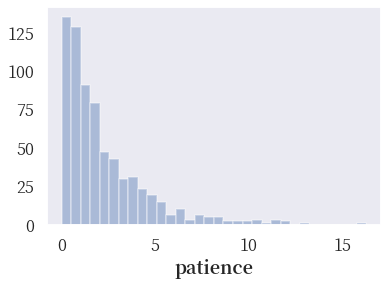

In [100]:
sns.distplot(user_patience['patience'], kde=False)

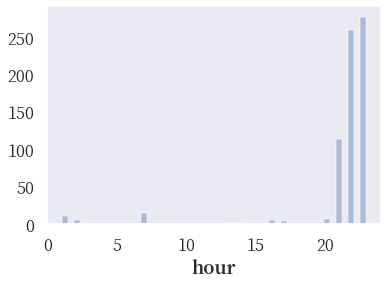

In [101]:
sns.distplot(user_patience['hour'], kde=False)

In [102]:
df2['>29'] = df2[[x for x in range(30,45)]].T.sum()

In [103]:
df2.drop(columns=[x for x in range(30,45)], inplace=True)

In [104]:
df2 = df2.T

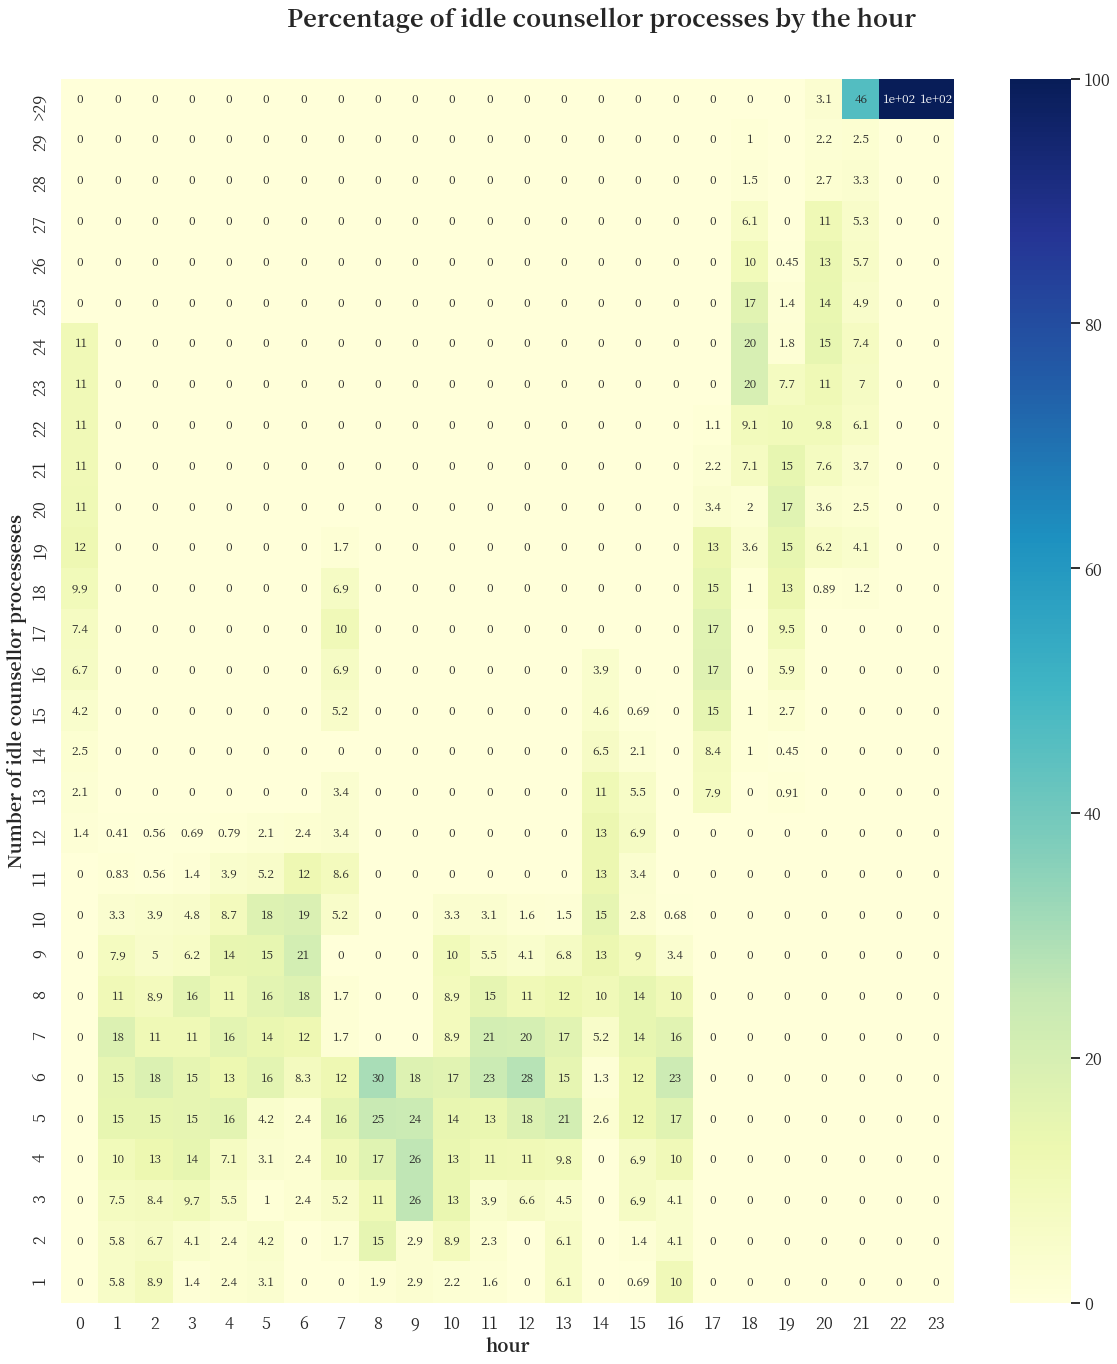

In [123]:
fig, ax = plt.subplots(figsize=(20, 25) )


sns.heatmap(df2[::-1], annot=True, ax=ax, annot_kws={"size": 12}, 
    cmap="YlGnBu",
);
fig.suptitle('Percentage of idle counsellor processes by the hour',
    fontsize=24, weight='heavy',
    fontweight=1000, y=.92)
plt.subplots_adjust(bottom=0.2)
ax.set_ylabel('Number of idle counsellor processeses')

# # workaround from https://github.com/mwaskom/seaborn/issues/1773
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
# plt.show() # ta-da!

# fig.savefig(f'queue_output/Queue_SW_24_DO_11_V_21.png', dpi=300, bbox_inches='tight')
plt.show()

# Number of instances when one/no counsellor is available (1500 simulations, seed=728, four or less processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']<=2], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot.png', dpi=300, bbox_inches='tight')

# Number of instances when at least two counsellors are idle (1500 simulations, seed=728, eight or more processes)

In [ ]:
process_plot = sns.catplot(col='day_of_week', y='hour', col_wrap=4,
    col_order=['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday'],
    data=df2[df2['num_counsellor_processes']>=8], kind="count",
    height=4, aspect=1);
process_plot.savefig(f'process_plot_2.png', dpi=300, bbox_inches='tight')